# Customer Return Calculation with Rule Based Classification
# Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama

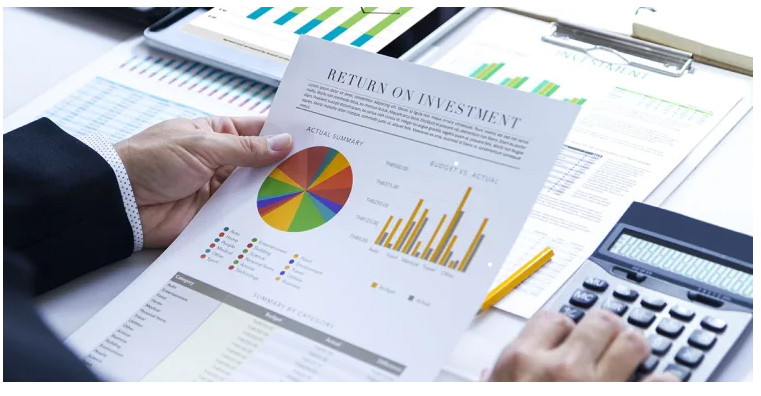

Photo by: https://online.hbs.edu/blog/post/how-to-calculate-roi-for-a-project

**Business Problem**

A game company wants to create a new level based customer definitions(personas) by using some of the features and wants to create segments according to these new customer definitions. Also, they want to estimate how much they can earn on average.

For example: The company want to determine how much a 25-year-old male user from Turkey, who is an IOS user, can earn on average.

**İş Problemi**

Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak seviye tabanlı (level based) yeni müşteri tanımları (persona)
oluşturmak ve bu yeni müşteri tanımlarına göre segmentler oluşturup bu segmentlere göre yeni gelebilecek müşterilerin şirkete
ortalama ne kadar kazandırabileceğini tahmin etmek istemektedir.

Örneğin: Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek kullanıcının ortalama ne kadar kazandırabileceği belirlenmek isteniyor.


**Dataset History**

Persona.csv dataset contains the prices of the products sold by an international game company and some demographic information of the users who buy these products. The data set consists of records created in each sales transaction. This means that the table is not deduplicated. In other words, a user with certain demographic characteristics may have made more than one purchase.


* Price : Price of the game
* Source : Platform of the game was downloaded
* Sex : Gender of the user
* Country : Country where the user downloaded the game
* Age : Age of the user

**Veri Seti Hikayesi**

Persona.csv veri seti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır. Veri seti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir kullanıcı birden fazla alışveriş yapmış olabilir.

* Price: Müşterinin harcama tutarı
* Source: Müşterinin bağlandığı cihaz türü
* Sex: Müşterinin cinsiyeti
* Country: Müşterinin ülkesi
* Age: Müşterinin yaşı

In [ ]:
################# Dataset appearance at the beginning/ Uygulama Öncesi #####################

#    PRICE   SOURCE   SEX COUNTRY  AGE
# 0     39  android  male     bra   17
# 1     39  android  male     bra   17
# 2     49  android  male     bra   17
# 3     29  android  male     tur   17
# 4     49  android  male     tur   17

################# Dataset appearance at the end/ Uygulama Sonrası #####################

#       customers_level_based        PRICE SEGMENT
# 0   BRA_ANDROID_FEMALE_0_18  1139.800000       A
# 1  BRA_ANDROID_FEMALE_19_23  1070.600000       A
# 2  BRA_ANDROID_FEMALE_24_30   508.142857       A
# 3  BRA_ANDROID_FEMALE_31_40   233.166667       C
# 4  BRA_ANDROID_FEMALE_41_66   236.666667       C

# PROJECT ASSIGNMENTS

# PROJE GÖREVLERİ

In [ ]:
# ASSIGNMENTS 1: Answer the following questions.
# GÖREV 1: Aşağıdaki soruları yanıtlayınız.

In [1]:
# Question  1: Read the persona.csv file and show the general information about the dataset.
# Soru 1: persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.


import pandas as pd
#pd.set_option("display.max_rows", None)
df = pd.read_csv(r"persona.csv")
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [3]:
df.shape

(5000, 5)

In [8]:
df["SEX"].value_counts() #/df.shape[0]

SEX
female    2621
male      2379
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [9]:
df.dtypes

PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object

In [11]:
#df["SOURCE"].value_counts()

SOURCE
android    2974
ios        2026
Name: count, dtype: int64

In [12]:
# Question 2: How many unique SOURCE? What is their frequency?
# Soru 2: Kaç unique SOURCE vardır? Frekansları nedir?
df["SOURCE"].nunique()

2

In [13]:
df["SOURCE"].unique()

array(['android', 'ios'], dtype=object)

In [14]:
df["SOURCE"].value_counts()

SOURCE
android    2974
ios        2026
Name: count, dtype: int64

In [15]:
# Question 3: How many unique Price are there?
# Soru 3: Kaç unique PRICE vardır?
df["PRICE"].nunique()

6

In [16]:
# Question 4: How many sales were made from each PRICE?
# Soru 4: Hangi PRICE'dan kaçar tane satış gerçekleşmiş?
df["PRICE"].value_counts()

PRICE
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: count, dtype: int64

In [18]:
df.groupby(["PRICE"]).agg({"PRICE":["count"]})

,PRICE
,count
PRICE,
9,200
19,992
29,1305
39,1260
49,1031
59,212


In [19]:
# Question 5: How many sales were made from each COUNTRY?
# Soru 5: Hangi ülkeden kaçar tane satış olmuş?
df["COUNTRY"].value_counts()

COUNTRY
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

In [22]:
df.groupby("COUNTRY").agg({"PRICE":["count"]})

,PRICE
,count
COUNTRY,
bra,1496
can,230
deu,455
fra,303
tur,451
usa,2065


In [16]:
# Question 6: How much money was earned in total from sales by each COUNTRY?
# Soru 6: Ülkelere göre satışlardan toplam ne kadar kazanılmış?
df.groupby("COUNTRY")["PRICE"].sum()

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

In [ ]:
df.head()

In [23]:
df.groupby("COUNTRY").agg({"PRICE": ["sum","mean","count"]})

PRICE                 
           sum       mean count
COUNTRY                        
bra      51354  34.327540  1496
can       7730  33.608696   230
deu      15485  34.032967   455
fra      10177  33.587459   303
tur      15689  34.787140   451
usa      70225  34.007264  2065

In [24]:
df.groupby("COUNTRY").agg({"PRICE": ["sum","mean","count"]}).columns # Nasil sortlariz Egzersiz...

MultiIndex([('PRICE',   'sum'),
            ('PRICE',  'mean'),
            ('PRICE', 'count')],
           )

In [18]:
# Question 7: What are the average sales according to different SOURCE types?
# Soru 7: SOURCE türlerine göre göre satış sayıları nedir?
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

In [26]:
# Question 8: What are the PRICE averages according to the countries?
# Soru 8: Ülkelere göre PRICE ortalamaları nedir?
df.groupby(by=['SOURCE']).agg({"PRICE": "mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


In [22]:
# Question 9: What are the PRICE averages according to the SOURCES?
# Soru 9: SOURCE'lara göre PRICE ortalamaları nedir?
df.groupby(by=['SOURCE']).agg({"PRICE": "mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


In [27]:
# Question 10: What are the PRICE averages in the COUNTRY-SOURCE breakdown?
# Soru 10: COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?
df.groupby(["COUNTRY", 'SOURCE']).agg({"PRICE": "mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [28]:
# Assignment 2: What are the PRICE averages in the breakdown of COUNTRY, SOURCE, SEX, AGE?
# GÖREV 2: COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).head(30)

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
                       20   31.000000
                       21   37.292683
                       22   34.945946
                       23   31.941176
                       24   36.500000
                       25   35.666667
                       26   33.166667
                       27   26.142857
                       28   22.333333
                       29   37.571429
                       30   45.666667
                       31   35.097561
                       32   39.000000
                       34   24.000000
                       37   33.736842
                       38   34.555556
                       39   43.000000
                       41   32.333333
                       43   44.000000
                       45   33.615385
                       56   37.000000
                male   15   39.344828
                       16   29.666667
                       17   37.157895
                       18   33.054054

In [33]:
df.groupby(by=["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

In [34]:
# ASSIGNMENT 3: Sort the output by PRICE.

# To see the output more clearly, apply the sort_values method to PRICE in descending order.
# Save the output as agg_df.

# GÖREV 3: Çıktıyı PRICE'a göre sıralayınız.

# Önceki sorudaki çıktıyı daha iyi görebilmek için sort_values metodunu azalan olacak şekilde PRICE'a uygulayınız.
# Çıktıyı agg_df olarak kaydediniz.

agg_df = df.groupby(by=["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)


agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


In [31]:
#df.groupby(by=["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)

In [33]:
#df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"})

In [37]:
agg_df.columns

Index(['PRICE'], dtype='object')

In [39]:
df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).reset_index()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.714286
1,bra,android,female,16,35.944444
2,bra,android,female,17,35.666667
3,bra,android,female,18,32.255814
4,bra,android,female,19,35.206897
...,...,...,...,...,...
343,usa,ios,male,42,30.250000
344,usa,ios,male,50,39.000000
345,usa,ios,male,53,34.000000
346,usa,ios,male,55,29.000000


In [43]:
# ASSIGNMENT 4: Convert the names in the index to variable names.


# GÖREV 4: Indekste yer alan isimleri değişken ismine çeviriniz.

# Üçüncü sorunun çıktısında yer alan PRICE dışındaki tüm değişkenler index isimleridir.
# Bu isimleri değişken isimlerine çeviriniz.
# İpucu: reset_index()

agg_df = agg_df.reset_index()
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [44]:
agg_df.shape

(348, 5)

In [46]:
agg_df["AGE"].max()

66

In [50]:
str(agg_df["AGE"].max())

'66'

In [41]:
'41_' + 

'41_66'

In [51]:
[agg_df["AGE"].min(), 18, 23, 30, 40,agg_df["AGE"].max()]

[15, 18, 23, 30, 40, 66]

<Axes: >

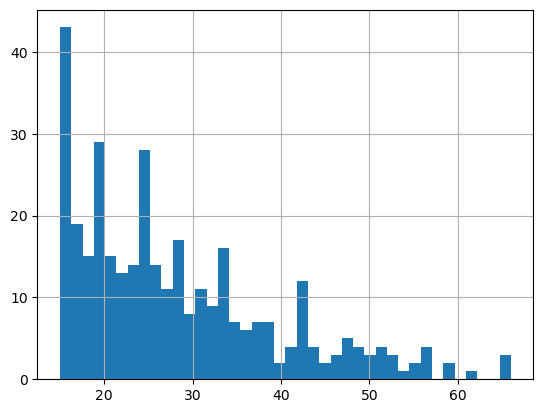

In [54]:
agg_df["AGE"].hist(bins=40)

In [55]:
# ASSIGNMENT 5: Convert AGE variable to categorical variable and add it to agg_df.

# Construct the intervals in a persuasive way.
# For example: '0_18', '19_23', '24_30', '31_40', '41_70'.


# GÖREV 5: AGE değişkenini kategorik değişkene çeviriniz ve agg_df'e ekleyiniz.

# Age sayısal değişkenini kategorik değişkene çeviriniz.
# Aralıkları ikna edici olacağını düşündüğünüz şekilde oluşturunuz.
# Örneğin: '0_18', '19_23', '24_30', '31_40', '41_70'

# AGE değişkeninin nerelerden bölüneceğini belirtelim:
bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()]
bins

[0, 18, 23, 30, 40, 66]

In [59]:
# Bölünen noktalara karşılık isimlendirmelerin ne olacağını ifade edelim:
mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())]
mylabels

['0_18', '19_23', '24_30', '31_40', '41_66']

In [46]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [56]:
agg_df["age_cat"] = 5
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat
0,bra,android,male,46,59.0,5
1,usa,android,male,36,59.0,5
2,fra,android,female,24,59.0,5
3,usa,ios,male,32,54.0,5
4,deu,android,female,36,49.0,5


In [57]:
bins

[0, 18, 23, 30, 40, 66]

In [60]:
mylabels

['0_18', '19_23', '24_30', '31_40', '41_66']

In [63]:
agg_df.loc[agg_df['AGE'] > 40, 'age_cat_m'] = "41_66"
agg_df.loc[agg_df['AGE'] < 19, 'age_cat_m'] = "0_18"
#..5 tanesi icin yapin...

In [66]:
agg_df["age_cat_m"].value_counts()

age_cat_m
0_18     77
41_66    57
Name: count, dtype: int64

In [67]:
# age'i bölelim:

#agg_df["age_cat"] = 
#pd.cut()
#(agg_df["AGE"], bins, labels=mylabels)

agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)
agg_df.head()



,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat,age_cat_m
0,bra,android,male,46,59.0,41_66,41_66
1,usa,android,male,36,59.0,31_40,NaN
2,fra,android,female,24,59.0,24_30,NaN
3,usa,ios,male,32,54.0,31_40,NaN
4,deu,android,female,36,49.0,31_40,NaN


In [69]:
agg_df["age_cat"].value_counts()

age_cat
24_30    78
0_18     77
19_23    71
31_40    65
41_66    57
Name: count, dtype: int64

In [ ]:
#ASSIGNMENT 6: Define new level based customers and add them as variables to the dataset.

# Attention! After creating customers_level_based values by list comprehension, these values need to be deduplicated.
# For example, there may be more than one of the following expressions: USA_ANDROID_MALE_0_18
# It is necessary to take them to groupby and get price averages.

# GÖREV 6: Yeni level based müşterileri tanımlayınız ve veri setine değişken olarak ekleyiniz.

# customers_level_based adında bir değişken tanımlayınız ve veri setine bu değişkeni ekleyiniz.Dikkat!
# list comp ile customers_level_based değerleri oluşturulduktan sonra bu değerlerin tekilleştirilmesi gerekmektedir.
# Örneğin birden fazla şu ifadeden olabilir: USA_ANDROID_MALE_0_18
# Bunları groupby'a alıp price ortalamalarını almak gerekmektedir.

In [70]:
# feature names/ değişken isimleri:
agg_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE', 'age_cat', 'age_cat_m'], dtype='object')

In [ ]:
# how do we reach the observation values?/ Gözlem değerlerine nasıl erişiriz?
#for row in agg_df.values:
#    print(row)

In [ ]:
#bra_android_male_41_66


In [71]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat,age_cat_m
0,bra,android,male,46,59.0,41_66,41_66
1,usa,android,male,36,59.0,31_40,NaN
2,fra,android,female,24,59.0,24_30,NaN
3,usa,ios,male,32,54.0,31_40,NaN
4,deu,android,female,36,49.0,31_40,NaN


In [74]:
agg_df.values[0][0]

'bra'

In [75]:
agg_df.values[0][1]

'android'

In [ ]:
#for row in agg_df.values

In [78]:
agg_df.values[0][0]+"_"+agg_df.values[0][1]+"_"+agg_df.values[0][2]+"_"+agg_df.values[0][5]

'bra_android_male_41_66'

In [77]:
#[row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]

In [ ]:
# We want to put the Values of the COUNTRY, SOURCE, SEX and age_cat variables next to each other 
# and concatenate them with an underscore.
# We can do this by using list comprehension.
# Let's perform the operation in such a way by using the observation values in the loop above:


# COUNTRY, SOURCE, SEX ve age_cat değişkenlerinin DEĞERLERİNİ yan yana koymak ve alt tireyle birleştirmek istiyoruz.
# Bunu list comprehension ile yapabiliriz.
# Yukarıdaki döngüdeki gözlem değerlerinin bize lazım olanlarını seçecek şekilde işlemi gerçekletirelim:

[row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]

In [87]:
for row in agg_df.values:
        print(row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper())

BRA_ANDROID_MALE_41_66
USA_ANDROID_MALE_31_40
FRA_ANDROID_FEMALE_24_30
USA_IOS_MALE_31_40
DEU_ANDROID_FEMALE_31_40
DEU_ANDROID_FEMALE_41_66
DEU_IOS_MALE_19_23
USA_ANDROID_FEMALE_41_66
FRA_IOS_MALE_19_23
USA_IOS_MALE_41_66
DEU_ANDROID_MALE_0_18
BRA_ANDROID_FEMALE_24_30
USA_ANDROID_FEMALE_41_66
TUR_IOS_MALE_24_30
DEU_ANDROID_MALE_31_40
TUR_IOS_FEMALE_0_18
BRA_ANDROID_FEMALE_41_66
BRA_IOS_FEMALE_19_23
TUR_ANDROID_FEMALE_31_40
BRA_ANDROID_FEMALE_31_40
TUR_IOS_MALE_31_40
TUR_ANDROID_MALE_0_18
USA_IOS_MALE_24_30
BRA_IOS_MALE_41_66
DEU_ANDROID_MALE_19_23
USA_IOS_MALE_24_30
TUR_ANDROID_FEMALE_0_18
USA_ANDROID_MALE_41_66
TUR_ANDROID_MALE_24_30
USA_IOS_FEMALE_41_66
FRA_ANDROID_MALE_19_23
USA_IOS_MALE_31_40
TUR_ANDROID_FEMALE_0_18
FRA_IOS_MALE_0_18
TUR_IOS_FEMALE_19_23
TUR_ANDROID_FEMALE_31_40
TUR_ANDROID_MALE_24_30
FRA_ANDROID_MALE_19_23
BRA_ANDROID_MALE_24_30
CAN_ANDROID_MALE_24_30
CAN_ANDROID_MALE_19_23
USA_ANDROID_MALE_41_66
TUR_ANDROID_MALE_24_30
BRA_ANDROID_MALE_31_40
BRA_ANDROID_MALE_0_18


In [98]:
# LIST COMPREHENSION
# Let's add to the dataset/ Veri setine ekleyelim:
agg_df["customers_level_based"] = [row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper()  for row in agg_df.values]
agg_df.head()

AttributeError: 'float' object has no attribute 'upper'

In [89]:
agg_df["customers_level_based"].value_counts()

customers_level_based
BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_66      7
USA_IOS_FEMALE_24_30        7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
                           ..
TUR_ANDROID_MALE_41_66      1
CAN_ANDROID_MALE_19_23      1
TUR_IOS_MALE_31_40          1
TUR_IOS_MALE_24_30          1
CAN_ANDROID_FEMALE_24_30    1
Name: count, Length: 109, dtype: int64

In [90]:
# Let's choose the necessary features./ Gereksiz değişkenleri çıkaralım:
agg_df = agg_df[["customers_level_based", "PRICE"]]
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_MALE_41_66,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0


In [ ]:
#for i in agg_df["customers_level_based"].values:
#    print(i.split("_"))

In [67]:
# We are one step closer to our goal.
# There is a small problem here. There will be many identical segments.
# For instance, there may be more than one segment USA_ANDROID_MALE_0_18.
# Let's check:




# Amacımıza bir adım daha yaklaştık.
# Burada ufak bir problem var. Birçok aynı segment olacak.
# örneğin USA_ANDROID_MALE_0_18 segmentinden birçok sayıda olabilir.
# kontrol edelim:

#agg_df["customers_level_based"].value_counts()

In [ ]:
#agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})

In [91]:
# For this reason, after groupby according to the segments, we should take the price averages and deduplicate the segments.

# Bu sebeple segmentlere göre groupby yaptıktan sonra price ortalamalarını almalı ve segmentleri tekilleştirmeliyiz.
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})



,PRICE
customers_level_based,
BRA_ANDROID_FEMALE_0_18,35.645303
BRA_ANDROID_FEMALE_19_23,34.077340
BRA_ANDROID_FEMALE_24_30,33.863946
BRA_ANDROID_FEMALE_31_40,34.898326
BRA_ANDROID_FEMALE_41_66,36.737179
...,...
USA_IOS_MALE_0_18,33.983495
USA_IOS_MALE_19_23,34.901872
USA_IOS_MALE_24_30,34.838143


In [69]:
agg_df.head()

,PRICE
customers_level_based,
BRA_ANDROID_FEMALE_0_18,35.645303
BRA_ANDROID_FEMALE_19_23,34.077340
BRA_ANDROID_FEMALE_24_30,33.863946
BRA_ANDROID_FEMALE_31_40,34.898326
BRA_ANDROID_FEMALE_41_66,36.737179


In [70]:
# customers_level_based is in the index. Let's turn that into a variable. 

#customers_level_based index'te yer almaktadır. Bunu değişkene çevirelim.
agg_df = agg_df.reset_index()
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


In [74]:
agg_df.sort_values("PRICE", ascending = False)

,customers_level_based,PRICE
54,FRA_ANDROID_FEMALE_24_30,45.428571
86,TUR_IOS_MALE_24_30,45.000000
87,TUR_IOS_MALE_31_40,42.333333
72,TUR_ANDROID_FEMALE_31_40,41.833333
25,CAN_ANDROID_MALE_19_23,40.111111
9,BRA_ANDROID_MALE_41_66,40.041667
65,FRA_IOS_MALE_19_23,39.888889
74,TUR_ANDROID_MALE_0_18,39.873016
76,TUR_ANDROID_MALE_24_30,39.439103
93,USA_ANDROID_FEMALE_41_66,39.250000


In [72]:
# Let's check. There should be only one persona for each.
# kontrol edelim. her bir persona'nın 1 tane olmasını bekleriz:
agg_df["customers_level_based"].value_counts()

BRA_ANDROID_FEMALE_0_18     1
TUR_ANDROID_FEMALE_0_18     1
TUR_IOS_FEMALE_19_23        1
TUR_IOS_FEMALE_0_18         1
TUR_ANDROID_MALE_41_66      1
TUR_ANDROID_MALE_31_40      1
TUR_ANDROID_MALE_24_30      1
TUR_ANDROID_MALE_19_23      1
TUR_ANDROID_MALE_0_18       1
TUR_ANDROID_FEMALE_41_66    1
TUR_ANDROID_FEMALE_31_40    1
TUR_ANDROID_FEMALE_24_30    1
TUR_ANDROID_FEMALE_19_23    1
FRA_IOS_MALE_41_66          1
FRA_ANDROID_FEMALE_31_40    1
FRA_IOS_MALE_31_40          1
FRA_IOS_MALE_24_30          1
FRA_IOS_MALE_19_23          1
FRA_IOS_MALE_0_18           1
FRA_IOS_FEMALE_31_40        1
FRA_IOS_FEMALE_24_30        1
FRA_IOS_FEMALE_0_18         1
FRA_ANDROID_MALE_41_66      1
FRA_ANDROID_MALE_31_40      1
FRA_ANDROID_MALE_24_30      1
FRA_ANDROID_MALE_19_23      1
TUR_IOS_FEMALE_24_30        1
TUR_IOS_FEMALE_31_40        1
TUR_IOS_FEMALE_41_66        1
TUR_IOS_MALE_0_18           1
USA_IOS_MALE_31_40          1
USA_IOS_MALE_24_30          1
USA_IOS_MALE_19_23          1
USA_IOS_MA

In [92]:
# ASSIGNMENT 7: Segment new customers (USA_ANDROID_MALE_0_18).

# Segment by PRICE, and add segments to agg_df with the feature name "SEGMENT".
# Describe the segments.

# GÖREV 7: Yeni müşterileri (USA_ANDROID_MALE_0_18) segmentlere ayırınız.

# PRICE'a göre segmentlere ayırınız,
# segmentleri "SEGMENT" isimlendirmesi ile agg_df'e ekleyiniz,
# segmentleri betimleyiniz,

#agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)

agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])
agg_df.head()

/var/folders/8v/xqx8xy3166qd8448k4ssdf7r0000gn/T/ipykernel_11197/4241442072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])


,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_MALE_41_66,59.0,A
1,USA_ANDROID_MALE_31_40,59.0,A
2,FRA_ANDROID_FEMALE_24_30,59.0,A
3,USA_IOS_MALE_31_40,54.0,A
4,DEU_ANDROID_FEMALE_31_40,49.0,A


In [93]:
import numpy as np

In [94]:
agg_df.groupby("SEGMENT").agg({"PRICE": "mean"})

,PRICE
SEGMENT,
D,27.302596
C,32.933339
B,35.436170
A,41.434736


In [96]:
#ASSIGNMENT 8: Classify the new customers and estimate how much money they can bring.

#Which segment does a 33-year-old Turkish woman using ANDROID belong to and how much money is expected to bring on average?

# GÖREV 8: Yeni gelen müşterileri sınıflandırınız ne kadar gelir getirebileceğini tahmin ediniz.

# 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
18,TUR_ANDROID_FEMALE_31_40,43.000000,A
35,TUR_ANDROID_FEMALE_31_40,40.666667,A


In [78]:
# #Which segment does a 35-year-old French woman using IOS belong to and how much money is expected to bring on average?

# 35 yaşında IOS kullanan bir Fransız kadını hangi segmente ve ortalama ne kadar gelir kazandırması beklenir?
new_user = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
